**Importando as bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

**Definindo Função que faz o Blox Plot**

In [2]:
def Box_Plot(data_treino, data_treino_0, data_treino_1, data_treino_2, nome_coluna):

    # Criando a figura e os subplots
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))

    # Função para adicionar as indicações de quartis nos boxplots
    def add_quartile_annotations(ax, data, delta, lim_sup, lim_inf):
        
        q1 = np.percentile(data, 25)
        median = np.percentile(data, 50)
        q3 = np.percentile(data, 75)
        
        q1_lim = (q1-lim_inf)/delta
        median_lim = (median-lim_inf)/delta
        q3_lim = (q3-lim_inf)/delta

        ax.text(0.05, q1_lim-0.05, f'Q1: {q1:.2f}', transform=ax.transAxes, ha='left')
        ax.text(0.1, median_lim+0.01, f'Mediana: {median:.2f}', transform=ax.transAxes, ha='left')
        ax.text(0.05, q3_lim+0.05, f'Q3: {q3:.2f}', transform=ax.transAxes, ha='left')

    # Plotando o primeiro boxplot (base treino)
    ax0 = sns.boxplot(y=data_treino, ax=axs[0], color = '#CCCCCC')
    axs[0].set_title('Todas as classes')

    # Plotando o segundo boxplot (base treino_0)
    ax1 = sns.boxplot(y=data_treino_0, ax=axs[1], color = '#98FB98')

    axs[1].set_title('Classe 0 ')

    # Plotando o terceiro boxplot (base treino_1)
    ax2 = sns.boxplot(y=data_treino_1, ax=axs[2], color = '#ADD8E6')
    axs[2].set_title('Classe 1')

    # Plotando o quarto boxplot (base treino_2)
    ax3 = sns.boxplot(y=data_treino_2, ax=axs[3], color = '#FFC0CB')
    axs[3].set_title('Classe 2')

    # Ajustando a dimensão dos eixos
    

    # Configurando as legendas dos eixos
    for ax in axs:
        ax.set_ylabel(nome_coluna)
        ax.set_xlabel('')
        ax.set_ylim(ax0.get_ylim())
        
    x, y = ax0.get_ylim()
    
    
    add_quartile_annotations(ax0, data_treino, delta = y-x, lim_sup = y, lim_inf =x)
    add_quartile_annotations(ax1, data_treino_0, delta = y-x, lim_sup = y, lim_inf =x)
    add_quartile_annotations(ax2, data_treino_1, delta = y-x, lim_sup = y, lim_inf = x)
    add_quartile_annotations(ax3, data_treino_2, delta = y-x, lim_sup = y, lim_inf = x)
    
    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Definindo Função que faz o histograma**

In [3]:
def dist(base, coluna_dist, coluna_target):

    # Configuração dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Primeiro gráfico - Distribuição geral
    sns.histplot(data = base, x =coluna_dist, ax=axs[0], kde=True, color = '#CCCCCC')
    axs[0].set_title('Distribuição Geral')

    # Segundo gráfico - Distribuição por classes
    sns.histplot(data=base, x=coluna_dist, hue = coluna_target, ax=axs[1], multiple='stack', kde=True, palette=['#98FB98', '#ADD8E6', '#FFC0CB'])
    axs[1].set_title('Distribuição por Classes')

    # Ajuste de layout
    plt.tight_layout()

    # Exibição dos gráficos
    plt.show()

**Definindo Função que faz uma breve análise da variável**

In [4]:
def analise_desc(data_treino, data_treino_0, data_treino_1, data_treino_2, coluna):
    
    # Obtendo os descritivos para cada base
    desc_treino = data_treino[coluna].describe().to_frame()
    desc_treino_0 = data_treino_0[coluna].describe().to_frame()
    desc_treino_1 = data_treino_1[coluna].describe().to_frame()
    desc_treino_2 = data_treino_2[coluna].describe().to_frame()

    # Renomeando as colunas para "Todas as Classes", "Classe 0", "Classe 1" e "Classe 2"
    desc_treino.columns = ['Todas as Classes']
    desc_treino_0.columns = ['Classe 0']
    desc_treino_1.columns = ['Classe 1']
    desc_treino_2.columns = ['Classe 2']

    # Concatenando os dataframes em um único dataframe
    desc_concatenado = pd.concat([desc_treino, desc_treino_0, desc_treino_1, desc_treino_2], axis=1)

    return desc_concatenado.round(2)

**Carregando o data frame**

In [5]:
df = load_wine(as_frame=True).data

df['target'] = load_wine(as_frame=True).target.to_frame()

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**Verificando a quantidade da coluna target e seu percentual**

In [6]:
result = df.groupby('target').size().reset_index(name='qtd')
result['percentual'] = round(result['qtd'] / len(df) * 100,2)
result

,target,qtd,percentual
0,0,59,33.15
1,1,71,39.89
2,2,48,26.97


**Filtrando as bases por target**

In [7]:
target_0 = df.loc[df['target'] == 0]
target_1 = df.loc[df['target'] == 1]
target_2 = df.loc[df['target'] == 2]

**Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão baseado nos dados de teste**

In [8]:
train_0, teste_0 = train_test_split(target_0, test_size=0.2, random_state=42)
train_1, teste_1 = train_test_split(target_1, test_size=0.2, random_state=42)
train_2, teste_2 = train_test_split(target_2, test_size=0.2, random_state=42)

**Consolidando Base de Treino e Teste**

In [9]:
treino = pd.concat([train_0, train_1, train_2], ignore_index=True)
teste = pd.concat([teste_0, teste_1, teste_2], ignore_index=True)

**Verificando a quantidade da coluna target**

In [10]:
result_train = treino.groupby('target').size().reset_index(name='qtd')
result_train['percentual'] = round(result_train['qtd'] / len(treino) * 100,2)
result_train

,target,qtd,percentual
0,0,47,33.33
1,1,56,39.72
2,2,38,26.95


**Verificando a quantidade da coluna target**

In [11]:
result_test = teste.groupby('target').size().reset_index(name='qtd')
result_test['percentual'] = round(result_test['qtd'] / len(teste) * 100,2)
result_test

,target,qtd,percentual
0,0,12,32.43
1,1,15,40.54
2,2,10,27.03


* Note que os percentuais da base de treino e teste estão semelhantes

## 📊 1. Análise Exploratória

In [12]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       141 non-null    float64
 1   malic_acid                    141 non-null    float64
 2   ash                           141 non-null    float64
 3   alcalinity_of_ash             141 non-null    float64
 4   magnesium                     141 non-null    float64
 5   total_phenols                 141 non-null    float64
 6   flavanoids                    141 non-null    float64
 7   nonflavanoid_phenols          141 non-null    float64
 8   proanthocyanins               141 non-null    float64
 9   color_intensity               141 non-null    float64
 10  hue                           141 non-null    float64
 11  od280/od315_of_diluted_wines  141 non-null    float64
 12  proline                       141 non-null    float64
 13  targe

**Contando os valores nulos em todo o DataFrame**

In [13]:
total_valores_nulos = treino.isnull().sum().sum()

# Exibindo o resultado

print('Este dataset tem {:.0f} atributos/colunas e {:.0f} linhas/amostras das quais, {:.0f} são linhas/amostras nulas.\nLogo, temos uma inconsistência de {:.2f}%'.format(treino.shape[1], treino.shape[0], total_valores_nulos, (total_valores_nulos/df.shape[0])*100 ))

Este dataset tem 14 atributos/colunas e 141 linhas/amostras das quais, 0 são linhas/amostras nulas.
Logo, temos uma inconsistência de 0.00%


### 📊 1.01 Análise Exploratória - alcohol

A coluna 'alcohol' se refere ao teor alcoólico do vinho em porcentagem

In [14]:
desc_alcohol = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'alcohol')
desc_alcohol

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,12.99,13.70,12.25,13.20
std,0.80,0.45,0.52,0.52
min,11.03,12.85,11.03,12.25
25%,12.36,13.34,11.86,12.84
50%,13.05,13.72,12.29,13.20
75%,13.63,14.06,12.51,13.50
max,14.83,14.83,13.67,14.34


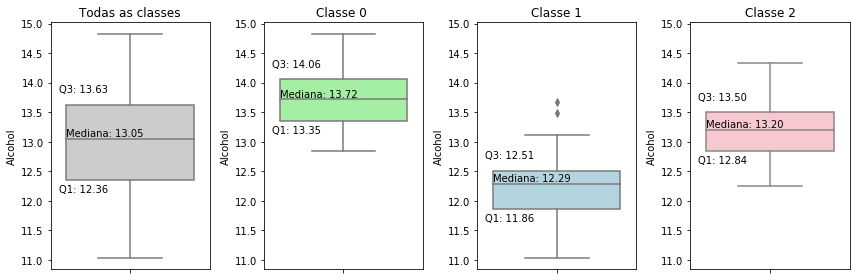

In [15]:
Box_Plot(data_treino = treino['alcohol'], data_treino_0 = train_0['alcohol'], data_treino_1 = train_1['alcohol'], data_treino_2 = train_2['alcohol'], nome_coluna = 'Alcohol')

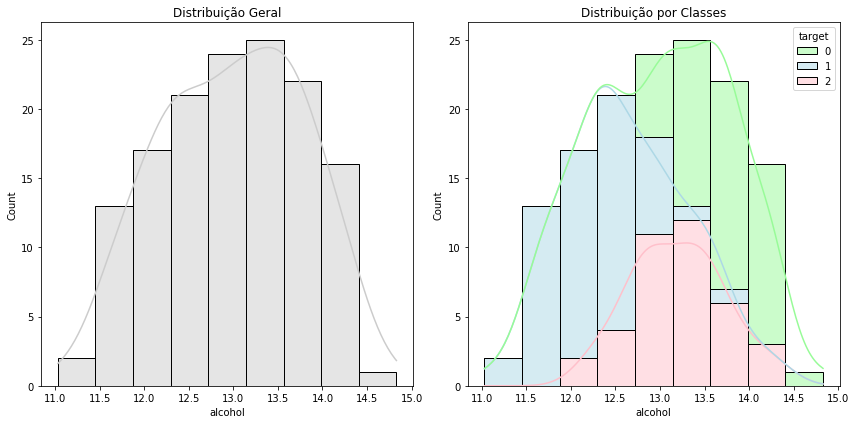

In [16]:
dist(treino, 'alcohol', 'target')

### 📊 1.02 Análise Exploratória - malic_acid

A coluna 'malic_acid' se refere a quantidade de ácido málico presente no vinho

In [17]:
desc_malic_acid = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'malic_acid')
desc_malic_acid

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.36,2.01,1.99,3.32
std,1.11,0.70,1.09,1.00
min,0.74,1.35,0.74,1.35
25%,1.61,1.64,1.31,2.58
50%,1.87,1.77,1.64,3.26
75%,3.17,1.91,2.14,3.90
max,5.80,3.99,5.80,5.51


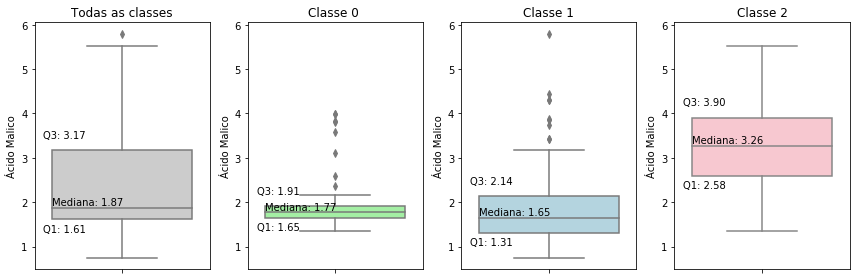

In [18]:
Box_Plot(data_treino = treino['malic_acid'], data_treino_0 = train_0['malic_acid'], data_treino_1 = train_1['malic_acid'], data_treino_2 = train_2['malic_acid'], nome_coluna = 'Ácido Malico')

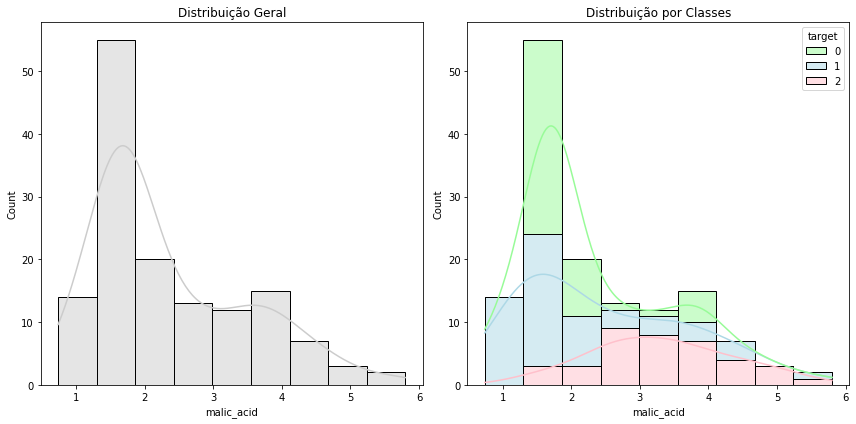

In [19]:
dist(treino, 'malic_acid', 'target')

### 📊 1.03 Análise Exploratória - ash
A coluna 'ash' se refere a quantidade de cinzas resultantes da queima do vinho

In [20]:
desc_ash = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'ash')
desc_ash

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.36,2.44,2.24,2.45
std,0.26,0.21,0.30,0.19
min,1.70,2.04,1.70,2.15
25%,2.20,2.28,2.00,2.30
50%,2.36,2.42,2.23,2.40
75%,2.56,2.61,2.40,2.61
max,3.23,2.87,3.23,2.86


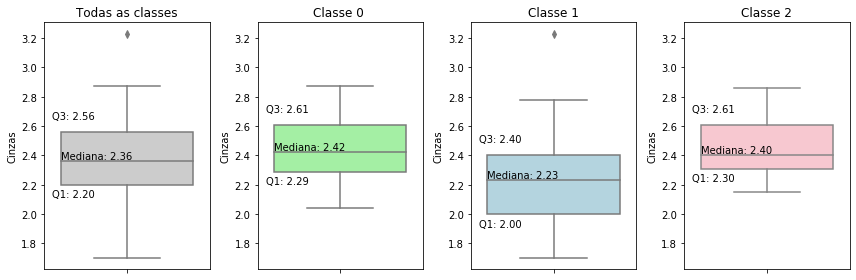

In [21]:
Box_Plot(data_treino = treino['ash'], data_treino_0 = train_0['ash'], data_treino_1 = train_1['ash'], data_treino_2 = train_2['ash'], nome_coluna = 'Cinzas')

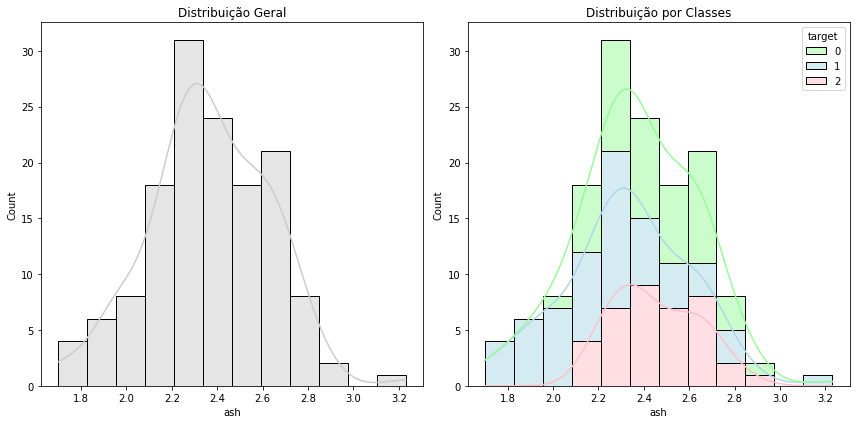

In [22]:
dist(treino, 'ash', 'target')

### 📊 1.04 Análise Exploratória - alcalinity_of_ash
A coluna 'alcalinity_of_ash' se refere a alcalinidade das cinzas do vinho

In [23]:
desc_alcalinity_of_ash = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'alcalinity_of_ash')
desc_alcalinity_of_ash

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,19.63,17.02,20.54,21.53
std,3.34,2.40,3.36,2.16
min,11.20,11.20,14.80,18.00
25%,17.20,16.00,18.00,20.00
50%,19.50,17.00,20.65,21.25
75%,21.50,18.70,22.12,23.00
max,30.00,22.50,30.00,25.50


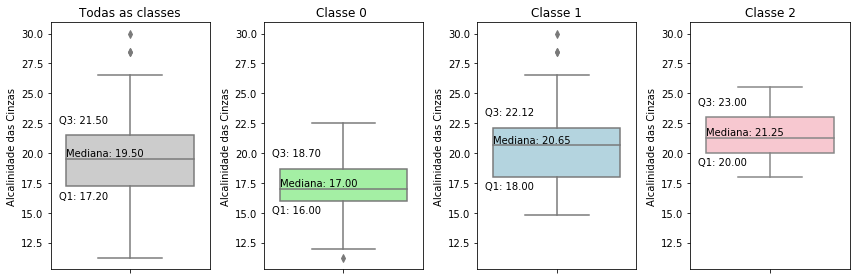

In [24]:
Box_Plot(data_treino = treino['alcalinity_of_ash'], data_treino_0 = train_0['alcalinity_of_ash'], data_treino_1 = train_1['alcalinity_of_ash'], data_treino_2 = train_2['alcalinity_of_ash'], nome_coluna = 'Alcalinidade das Cinzas')

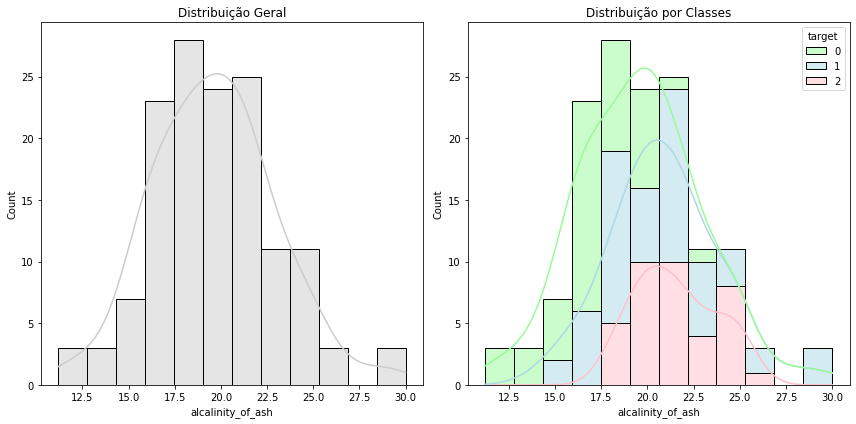

In [25]:
dist(treino, 'alcalinity_of_ash', 'target')

### 📊 1.05 Análise Exploratória - magnesium
A coluna 'magnesium' se refere a quantidade de magnésio presente no vinho

In [26]:
desc_magnesium = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'magnesium')
desc_magnesium

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,99.61,105.77,93.98,100.29
std,14.20,10.29,16.49,11.41
min,70.00,90.00,70.00,80.00
25%,88.00,98.00,85.00,90.25
50%,98.00,103.00,88.00,98.00
75%,107.00,113.50,98.25,106.75
max,162.00,132.00,162.00,123.00


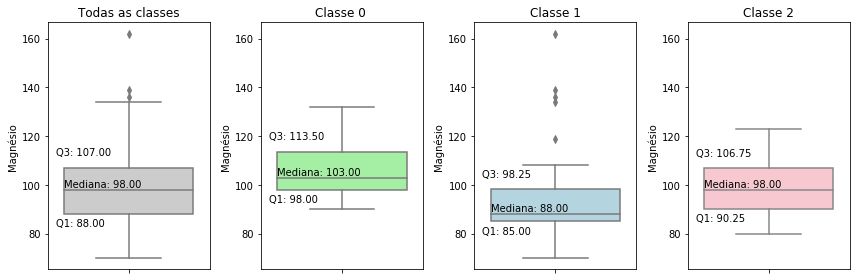

In [27]:
Box_Plot(data_treino = treino['magnesium'], data_treino_0 = train_0['magnesium'], data_treino_1 = train_1['magnesium'], data_treino_2 = train_2['magnesium'], nome_coluna = 'Magnésio')

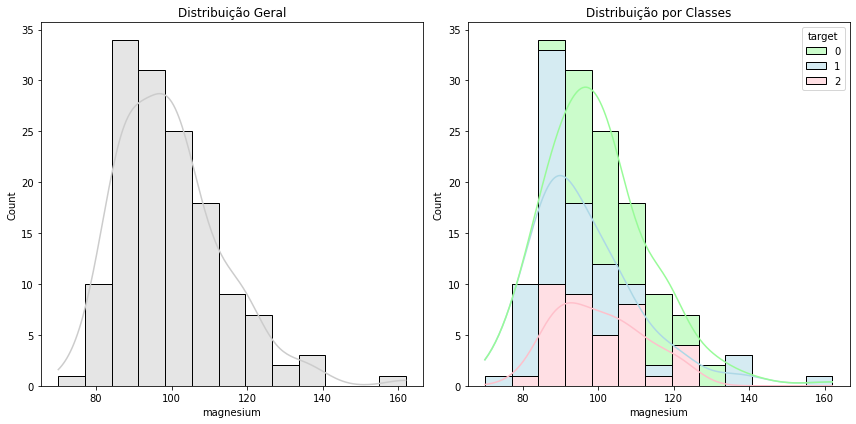

In [28]:
dist(treino, 'magnesium', 'target')

### 📊 1.06 Análise Exploratória - total_phenols
A coluna 'total_phenols' se refere a quantidade total de compostos fenólicos presentes no vinho

In [29]:
desc_total_phenols = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'total_phenols')
desc_total_phenols

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.30,2.81,2.28,1.69
std,0.61,0.33,0.53,0.38
min,0.98,2.20,1.10,0.98
25%,1.79,2.60,1.95,1.40
50%,2.40,2.80,2.20,1.64
75%,2.80,2.99,2.57,1.82
max,3.88,3.88,3.52,2.80


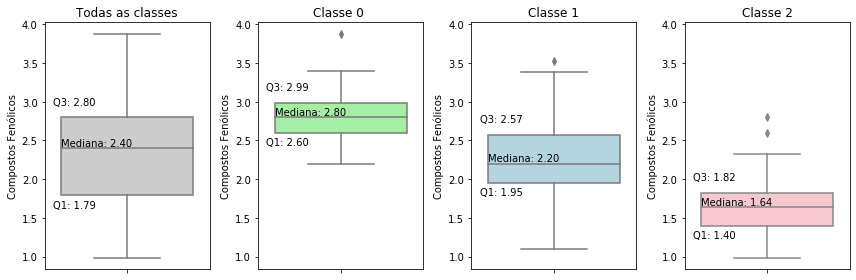

In [30]:
Box_Plot(data_treino = treino['total_phenols'], data_treino_0 = train_0['total_phenols'], data_treino_1 = train_1['total_phenols'], data_treino_2 = train_2['total_phenols'], nome_coluna = 'Compostos Fenólicos')

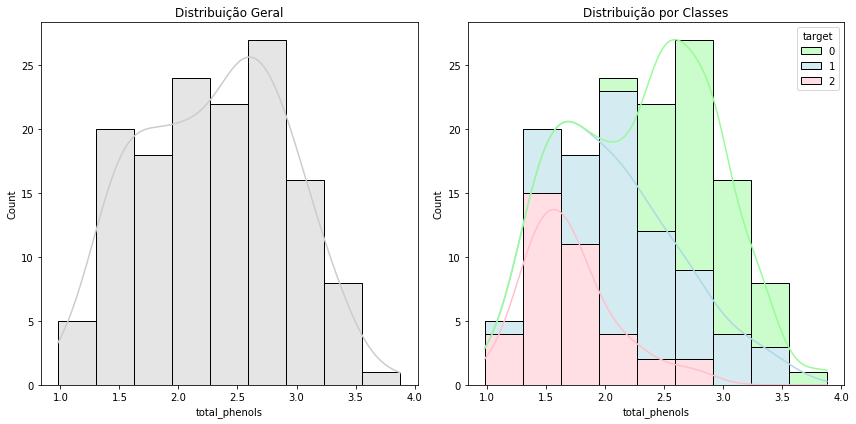

In [31]:
dist(treino, 'total_phenols', 'target')

### 📊 1.07 Análise Exploratória - flavanoids
A coluna 'flavanoids' se refere a quantidade de flavonoides presentes no vinho

In [32]:
desc_flavanoids = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'flavanoids')
desc_flavanoids

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.05,2.95,2.13,0.81
std,0.98,0.39,0.71,0.30
min,0.34,2.19,0.99,0.34
25%,1.22,2.68,1.64,0.60
50%,2.17,2.97,2.06,0.72
75%,2.89,3.18,2.46,0.95
max,5.08,3.93,5.08,1.57


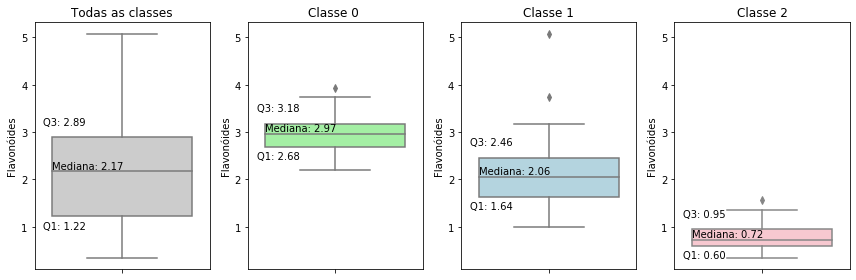

In [33]:
Box_Plot(data_treino = treino['flavanoids'], data_treino_0 = train_0['flavanoids'], data_treino_1 = train_1['flavanoids'], data_treino_2 = train_2['flavanoids'], nome_coluna = 'Flavonóides')

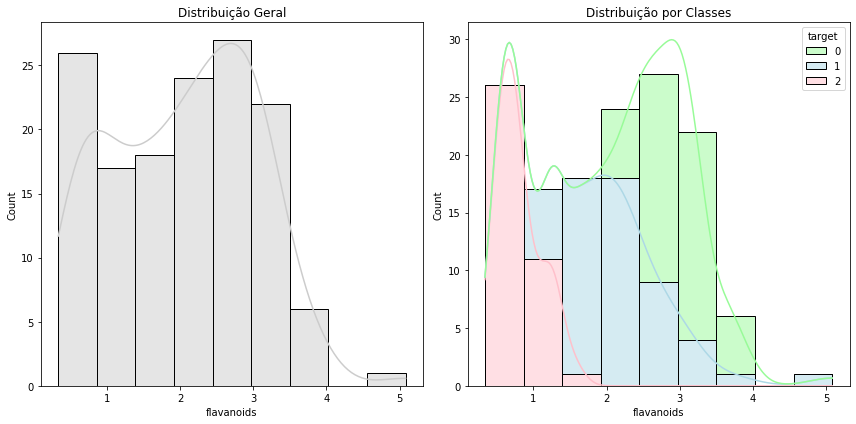

In [34]:
dist(treino, 'flavanoids', 'target')

### 📊 1.08 Análise Exploratória - nonflavanoid_phenols
A coluna 'nonflavanoid_phenols' se refere a quantidade de compostos fenólicos não flavonoides presentes no vinho

In [35]:
desc_nonflavanoid_phenols = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'nonflavanoid_phenols')
desc_nonflavanoid_phenols

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,0.35,0.28,0.35,0.43
std,0.12,0.07,0.11,0.13
min,0.13,0.17,0.13,0.17
25%,0.26,0.24,0.27,0.38
50%,0.32,0.28,0.34,0.44
75%,0.43,0.32,0.42,0.53
max,0.63,0.50,0.63,0.63


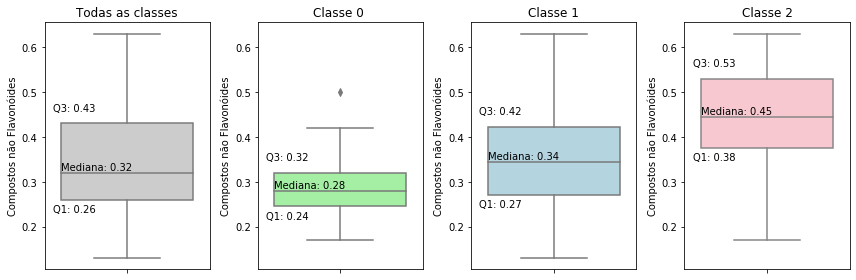

In [36]:
Box_Plot(data_treino = treino['nonflavanoid_phenols'], data_treino_0 = train_0['nonflavanoid_phenols'], data_treino_1 = train_1['nonflavanoid_phenols'], data_treino_2 = train_2['nonflavanoid_phenols'], nome_coluna = 'Compostos não Flavonóides')

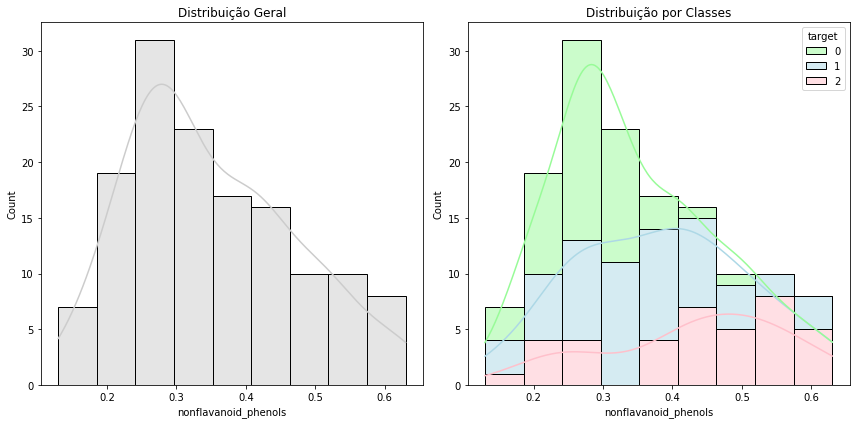

In [37]:
dist(treino, 'nonflavanoid_phenols', 'target')

### 📊 1.09 Análise Exploratória - proanthocyanins
A coluna 'proanthocyanins' se refere a quantidade de proantocianidinas presentes no vinho

In [38]:
desc_proanthocyanins = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'proanthocyanins')
desc_proanthocyanins

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,1.61,1.89,1.68,1.16
std,0.57,0.42,0.60,0.43
min,0.41,1.25,0.41,0.64
25%,1.26,1.60,1.35,0.84
50%,1.54,1.86,1.58,1.07
75%,1.96,2.06,1.95,1.34
max,3.58,2.96,3.58,2.70


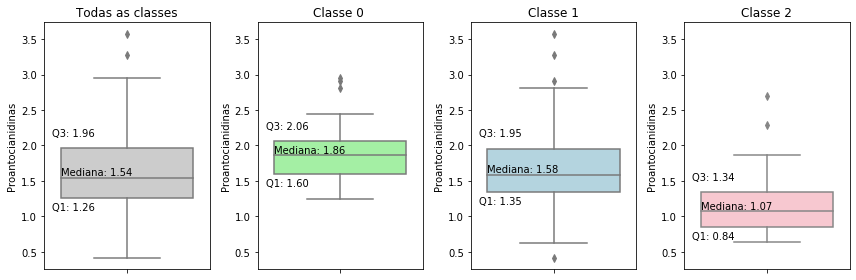

In [39]:
Box_Plot(data_treino = treino['proanthocyanins'], data_treino_0 = train_0['proanthocyanins'], data_treino_1 = train_1['proanthocyanins'], data_treino_2 = train_2['proanthocyanins'], nome_coluna = 'Proantocianidinas')

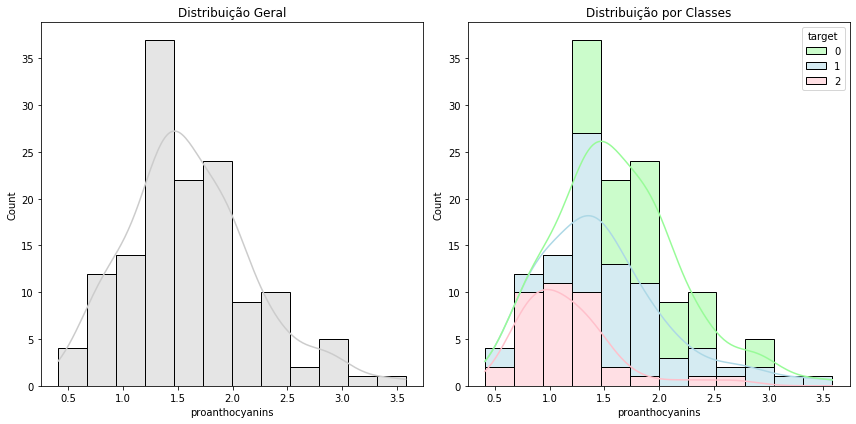

In [40]:
dist(treino, 'proanthocyanins', 'target')

### 📊 1.10 Análise Exploratória - color_intensity
A coluna 'color_intensity' se refere a intensidade da cor do vinho

In [41]:
desc_color_intensity = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'color_intensity')
desc_color_intensity

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,5.02,5.42,3.09,7.38
std,2.34,1.18,0.99,2.43
min,1.28,3.52,1.28,3.85
25%,3.25,4.50,2.49,5.31
50%,4.68,5.20,2.90,7.20
75%,6.13,6.20,3.40,9.28
max,13.00,8.70,6.00,13.00


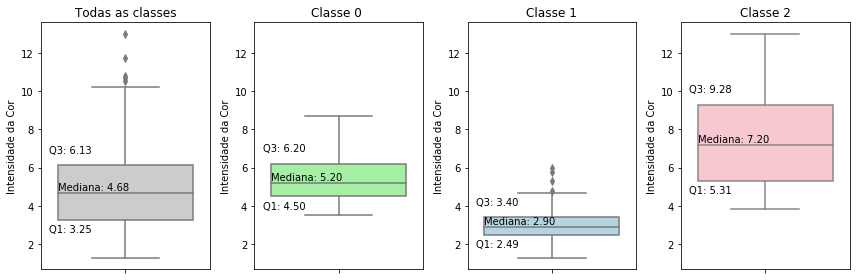

In [42]:
Box_Plot(data_treino = treino['color_intensity'], data_treino_0 = train_0['color_intensity'], data_treino_1 = train_1['color_intensity'], data_treino_2 = train_2['color_intensity'], nome_coluna = 'Intensidade da Cor')

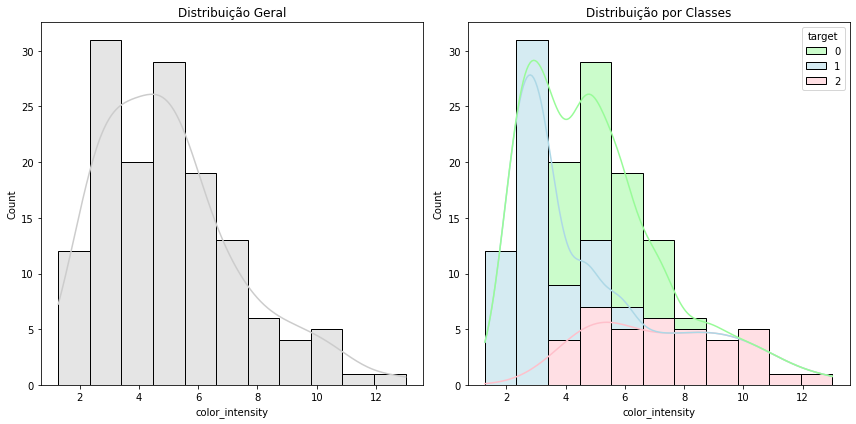

In [43]:
dist(treino, 'color_intensity', 'target')

### 📊 1.11 Análise Exploratória - hue
A coluna 'hue' se refere a tonalidade do vinho

In [44]:
desc_hue = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'hue')
desc_hue

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,0.96,1.06,1.05,0.69
std,0.23,0.12,0.21,0.12
min,0.48,0.82,0.69,0.48
25%,0.78,1.00,0.92,0.59
50%,0.97,1.06,1.04,0.68
75%,1.12,1.12,1.19,0.77
max,1.71,1.28,1.71,0.96


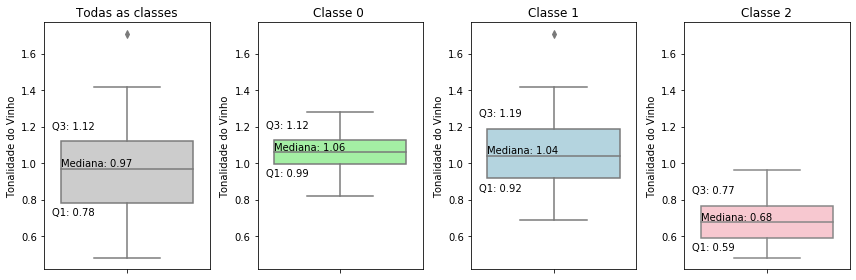

In [45]:
Box_Plot(data_treino = treino['hue'], data_treino_0 = train_0['hue'], data_treino_1 = train_1['hue'], data_treino_2 = train_2['hue'], nome_coluna = 'Tonalidade do Vinho')

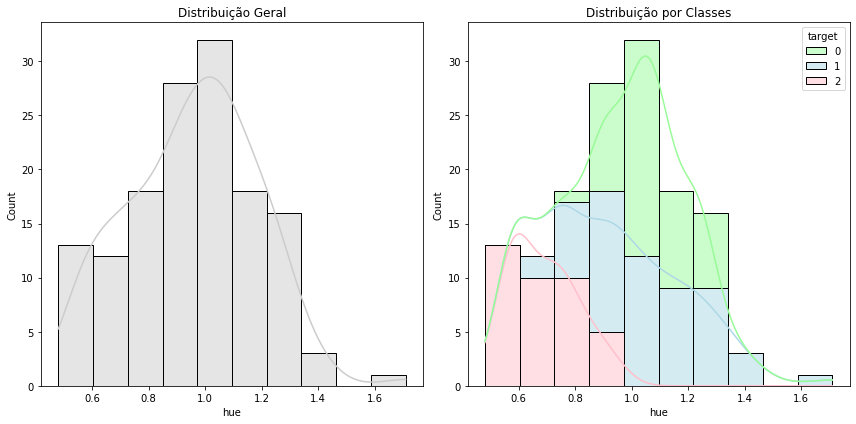

In [46]:
dist(treino, 'hue', 'target')

### 📊 1.12 Análise Exploratória - od280/od315_of_diluted_wines
A coluna 'od280/od315_of_diluted_wines' se refere a relação entre a absorbância da luz a 280 nm e a absorbância a 315 nm

In [47]:
desc_od = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'od280/od315_of_diluted_wines')
desc_od

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.63,3.17,2.81,1.69
std,0.71,0.36,0.49,0.29
min,1.27,2.51,1.59,1.27
25%,2.00,2.87,2.46,1.52
50%,2.78,3.17,2.82,1.65
75%,3.18,3.46,3.16,1.82
max,4.00,4.00,3.69,2.47


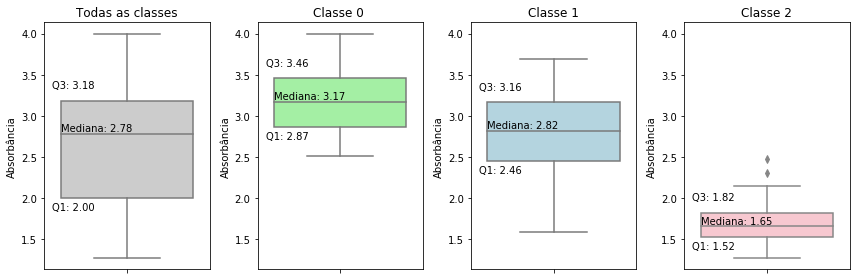

In [48]:
Box_Plot(data_treino = treino['od280/od315_of_diluted_wines'], data_treino_0 = train_0['od280/od315_of_diluted_wines'], data_treino_1 = train_1['od280/od315_of_diluted_wines'], data_treino_2 = train_2['od280/od315_of_diluted_wines'], nome_coluna = 'Absorbância')

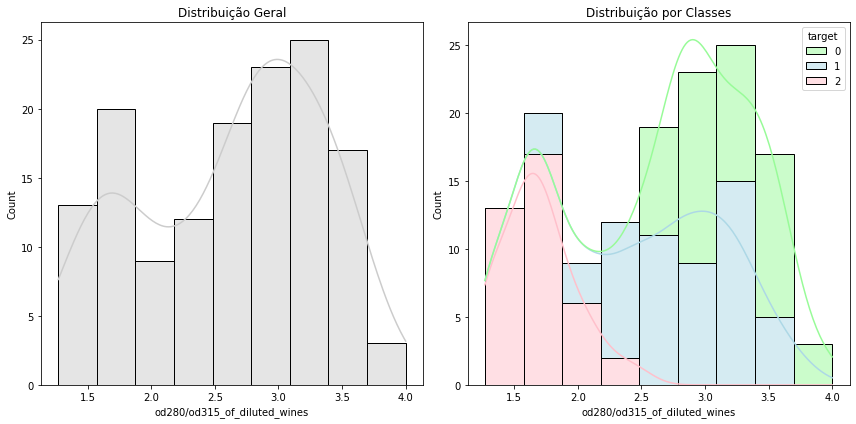

In [49]:
dist(treino, 'od280/od315_of_diluted_wines', 'target')

### 📊 1.13 Análise Exploratória - proline
A coluna 'proline' se refere a A quantidade de prolina, um aminoácido, presente no vinho

In [50]:
desc_proline = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'proline')
desc_proline

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,741.85,1095.04,522.84,627.76
std,307.91,224.76,161.01,113.89
min,278.00,680.00,278.00,415.00
25%,502.00,945.00,406.75,552.50
50%,672.00,1060.00,491.50,622.50
75%,970.00,1272.50,626.25,691.25
max,1680.00,1680.00,985.00,855.00


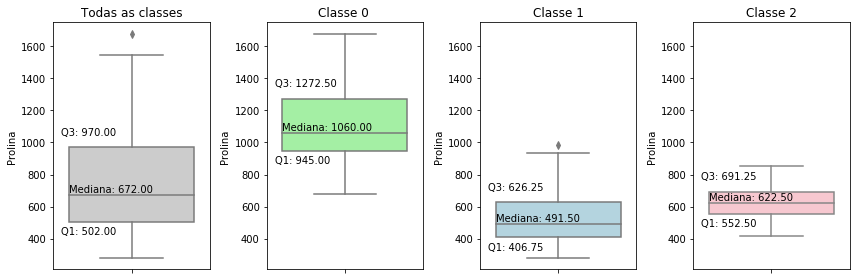

In [51]:
Box_Plot(data_treino = treino['proline'], data_treino_0 = train_0['proline'], data_treino_1 = train_1['proline'], data_treino_2 = train_2['proline'], nome_coluna = 'Prolina')

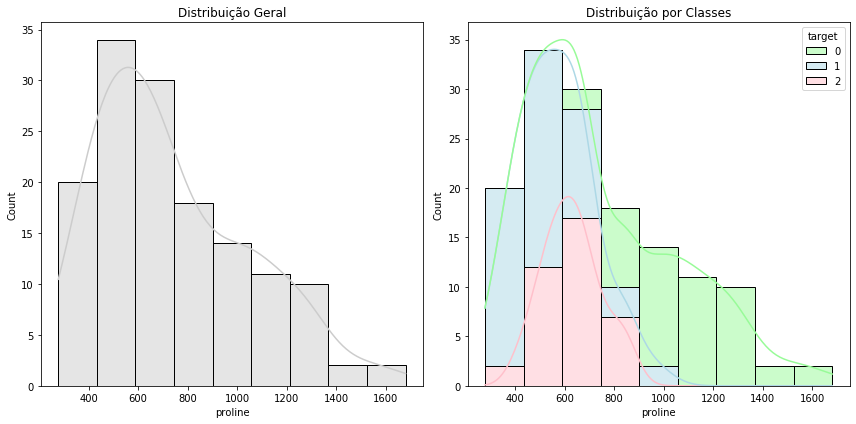

In [52]:
dist(treino, 'proline', 'target')

### 📊 1.14 Análise de Correlação

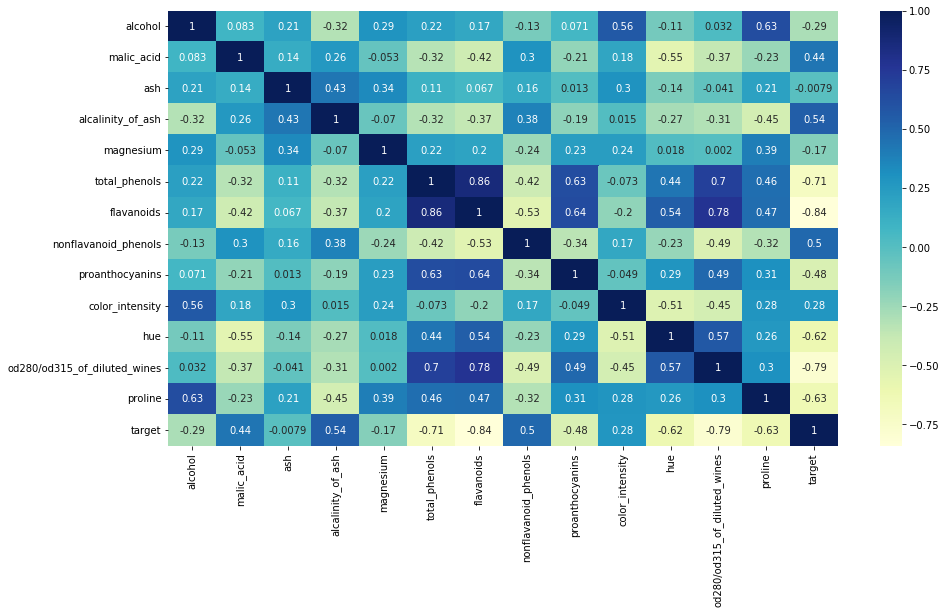

In [53]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = treino.corr()

fig, ax = plt.subplots(figsize=(15, 8))  # Definindo o tamanho da figura

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", ax=ax)

plt.show()  # Exibindo o gráfico

## 🤖 3. Modelagem Estatística

In [54]:
# Listando as variáveis explicativas

vars_exp = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline']

# Listando a variável resposta

vars_resp = ['target']

#### 🤖 3.1 Regressão Logística

Acurácia no Treino - Regressão Logística: 0.97872
Acurácia no Teste - Regressão Logística: 0.94595


C:\Users\GZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


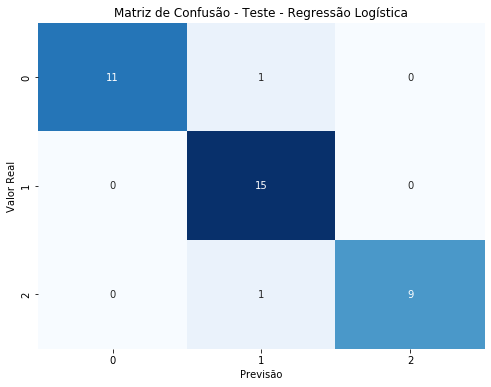

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de regressão logística
model_logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=100)

# Treinar o modelo com os dados de treino
model_logistic_regression.fit(treino[vars_exp], treino[vars_resp].values.ravel())

y_pred_train_logistic = model_logistic_regression.predict(treino[vars_exp])

# Calcular a acurácia do treino

accuracy_train_logistic = accuracy_score(treino[vars_resp], y_pred_train_logistic)
print("Acurácia no Treino - Regressão Logística:", accuracy_train_logistic.round(5))

# Fazer previsões com os dados de teste
y_pred_logistic = model_logistic_regression.predict(teste[vars_exp])

# Calcular a acurácia das previsões
accuracy_logistic = accuracy_score(teste[vars_resp], y_pred_logistic)
print("Acurácia no Teste - Regressão Logística:", accuracy_logistic.round(5))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste[vars_resp], y_pred_logistic)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Regressão Logística')
plt.show()

In [56]:
coefficients = model_logistic_regression.coef_
bias = model_logistic_regression.intercept_

print("Primeira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[0][i]}  ''')
print(f'''Bias: {bias[0]} \n''')

print("Segunda regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[1][i]}  ''')
print(f'''Bias: {bias[1]} \n''')

print("Terceira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[2][i]}  ''')
print(f'''Bias: {bias[2]} \n''')


Primeira regressão Logística:

Coeficiente relacionado a variável alcohol: 0.23502059507883297  
Coeficiente relacionado a variável malic_acid: 0.2988461419340011  
Coeficiente relacionado a variável ash: 0.1113225732094519  
Coeficiente relacionado a variável alcalinity_of_ash: -0.47675587885519416  
Coeficiente relacionado a variável magnesium: -0.0505292441224808  
Coeficiente relacionado a variável total_phenols: 0.2295800404800133  
Coeficiente relacionado a variável flavanoids: 0.4236756227951124  
Coeficiente relacionado a variável nonflavanoid_phenols: -0.02111289046022655  
Coeficiente relacionado a variável proanthocyanins: 0.04493042035975124  
Coeficiente relacionado a variável color_intensity: 0.13986685462132867  
Coeficiente relacionado a variável hue: 0.004912118927348842  
Coeficiente relacionado a variável od280/od315_of_diluted_wines: 0.32755498834937063  
Coeficiente relacionado a variável proline: 0.010403755580823149  
Bias: -0.010102030169821908 

Segunda regress

#### 🤖 3.2 Árvore de Decisão

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de árvore de decisão
model_tree = DecisionTreeClassifier()

# Treinar o modelo com os dados de treino
model_tree.fit(treino[vars_exp], treino[vars_resp].values.ravel())

y_pred_train_tree = model_tree.predict(treino[vars_exp])

# Calcular a acurácia do treino

accuracy_train_tree = accuracy_score(treino[vars_resp], y_pred_train_tree)
print("Acurácia no Treino - Árvode de Decisão:", accuracy_train_tree.round(5))

# Fazer previsões com os dados de teste
y_pred_tree = model_tree.predict(teste[vars_exp])

# Calcular a acurácia das previsões
accuracy_tree = accuracy_score(teste[vars_resp], y_pred_tree)
print("Acurácia no Teste - Árvode de Decisão:", accuracy_tree.round(5))

Acurácia no Treino - Árvode de Decisão: 1.0
Acurácia no Teste - Árvode de Decisão: 0.91892


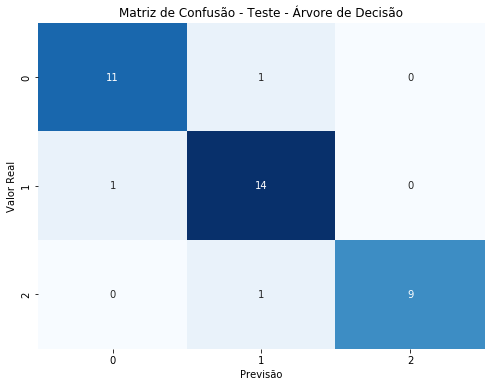

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste[vars_resp], y_pred_tree)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Árvore de Decisão')
plt.show()

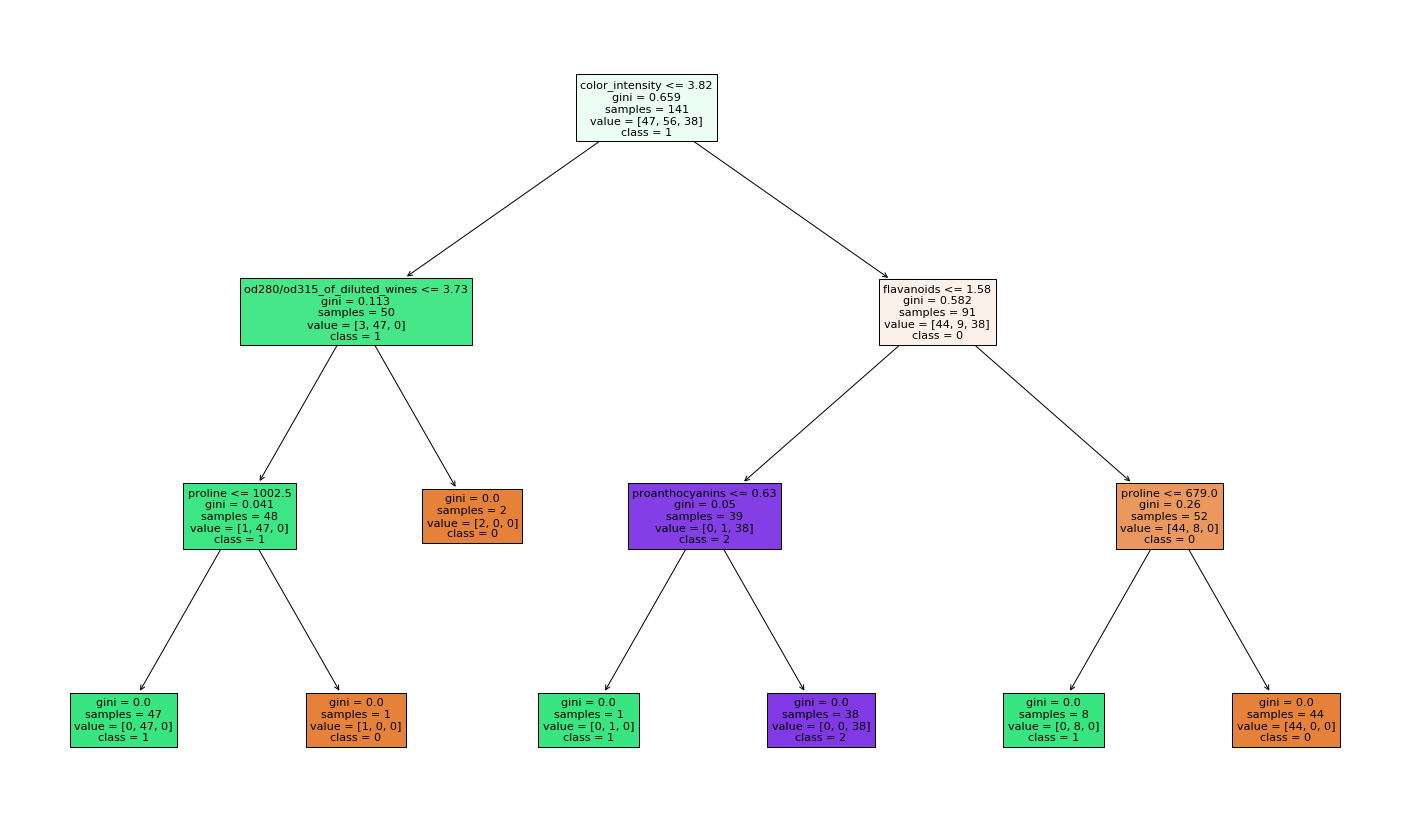

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Plotar a árvore de decisão
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_tree, feature_names=vars_exp, class_names=['0','1','2'], filled=True)
plt.show()

In [60]:
importance = model_tree.feature_importances_
importance

for i, y in enumerate(vars_exp):
    print(f'''A importância da variável {y} é: {round(importance[i],2)} ''')

A importância da variável alcohol é: 0.0 
A importância da variável malic_acid é: 0.0 
A importância da variável ash é: 0.0 
A importância da variável alcalinity_of_ash é: 0.0 
A importância da variável magnesium é: 0.0 
A importância da variável total_phenols é: 0.0 
A importância da variável flavanoids é: 0.4 
A importância da variável nonflavanoid_phenols é: 0.0 
A importância da variável proanthocyanins é: 0.02 
A importância da variável color_intensity é: 0.37 
A importância da variável hue é: 0.0 
A importância da variável od280/od315_of_diluted_wines é: 0.04 
A importância da variável proline é: 0.17 


#### 🤖 3.3 Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo Gradient Boosting para classificação multiclasse
model_boosting = GradientBoostingClassifier()

# Treinar o modelo com os dados de treino
model_boosting.fit(treino[vars_exp], treino[vars_resp].values.ravel())


y_pred_train_boosting = model_boosting.predict(treino[vars_exp])

# Calcular a acurácia do treino

accuracy_train_boosting = accuracy_score(treino[vars_resp], y_pred_train_boosting)
print("Acurácia no Treino - Boosting:", accuracy_train_boosting.round(5))

# Fazer previsões com os dados de teste
y_pred_boosting = model_boosting.predict(teste[vars_exp])


# Calcular a acurácia das previsões
accuracy_boosting = accuracy_score(teste[vars_resp], y_pred_boosting)
print("Acurácia no Teste - Boosting:", accuracy_boosting.round(5))

Acurácia no Treino - Boosting: 1.0
Acurácia no Teste - Boosting: 1.0


In [62]:
importances = model_boosting.feature_importances_
for i, importance in enumerate(importances):
    print(f"{vars_exp[i]}: {importance}")

alcohol: 0.02189085515591429
malic_acid: 0.043099559393757855
ash: 0.005788302415069772
alcalinity_of_ash: 0.007298177389040979
magnesium: 0.0062837437772222384
total_phenols: 0.0022225079196816397
flavanoids: 0.31826044274563436
nonflavanoid_phenols: 0.0007348230175807348
proanthocyanins: 0.00063872232531571
color_intensity: 0.2883335098014557
hue: 0.005081075760971211
od280/od315_of_diluted_wines: 0.024223021636391544
proline: 0.2761452586619638


**A nível de curiosidade, o modelo Boosting faz diversas árvores de decisão. No Boosting feito nesse trabalho, são realizadas 300 árvores. O código abaixo mostra cada uma delas**

In [ ]:
from sklearn import tree

for i, arvores in enumerate(model_boosting.estimators_):
    
    print(f"Árvore {i+1}:")
    
    fig, ax = plt.subplots(figsize=(25, 15))
    tree.plot_tree(arvores[0], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(25, 15))
    tree.plot_tree(arvores[1], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(25, 15))
    tree.plot_tree(arvores[2], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
    plt.show()

In [ ]:
'alcohol': O teor alcoólico do vinho em porcentagem.
'malic_acid': A quantidade de ácido málico presente no vinho.
'ash': A quantidade de cinzas resultantes da queima do vinho.
'alcalinity_of_ash': A alcalinidade das cinzas do vinho, medida em mEq/L.
'magnesium': A quantidade de magnésio presente no vinho.
'total_phenols': A quantidade total de compostos fenólicos presentes no vinho.
'flavanoids': A quantidade de flavonoides presentes no vinho.
'nonflavanoid_phenols': A quantidade de compostos fenólicos não flavonoides presentes no vinho.
'proanthocyanins': A quantidade de proantocianidinas presentes no vinho.
'color_intensity': A intensidade da cor do vinho, medida pela absorção da luz em 280 nm.
'hue': A tonalidade do vinho, onde valores mais baixos indicam uma cor mais esverdeada e valores mais altos indicam uma cor mais avermelhada.
'od280/od315_of_diluted_wines': A relação entre a absorbância da luz a 280 nm e a absorbância a 315 nm, indicando a intensidade da cor.
'proline': A quantidade de prolina, um aminoácido, presente no vinho.
Essas variáveis fornecem informações sobre características químicas e físicas dos vinhos que podem ser utilizadas para análise e classificação dos mesmos.